<a href="https://colab.research.google.com/github/Kim-yongbeom/machine-learning/blob/main/data11/%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
boston =  load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
print('보스톤 주택 가격 데이터셋 크기 : ', boston_df.shape)

보스톤 주택 가격 데이터셋 크기 :  (506, 14)


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# X, Y 분할하기
Y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1, inplace=False)

In [19]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [20]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [22]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [11]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [12]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [13]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [24]:
Y_predict[:5]

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641])

In [25]:
Y_test
# 비슷하지만 차이가 조금있다.

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
       ... 
393    13.8
325    24.6
53     23.4
401     7.2
178    29.9
Name: PRICE, Length: 152, dtype: float64

# **결과 분석 및 시각화**

In [14]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

# MSE, RMSE는 작은게 좋다
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
# R2는 큰게 좋다
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757


In [26]:
# 절편과 회귀계수를 찍어보자.
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  40.995595172164755
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [31]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [32]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [33]:
# ,2 는 소숫점 2번째 자리까지 보여줌
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns)
coef.sort_values()

NOX       -19.80
DIS        -1.74
PTRATIO    -0.92
LSTAT      -0.57
CRIM       -0.11
TAX        -0.01
AGE         0.01
B           0.01
INDUS       0.03
ZN          0.07
RAD         0.36
CHAS        3.05
RM          3.35
dtype: float64

In [36]:
coef

CRIM       -0.11
ZN          0.07
INDUS       0.03
CHAS        3.05
NOX       -19.80
RM          3.35
AGE         0.01
DIS        -1.74
RAD         0.36
TAX        -0.01
PTRATIO    -0.92
B           0.01
LSTAT      -0.57
dtype: float64

In [34]:
coef.sort_values(ascending = False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
B           0.01
AGE         0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

In [35]:
# index 정렬
coef.sort_index()

AGE         0.01
B           0.01
CHAS        3.05
CRIM       -0.11
DIS        -1.74
INDUS       0.03
LSTAT      -0.57
NOX       -19.80
PTRATIO    -0.92
RAD         0.36
RM          3.35
TAX        -0.01
ZN          0.07
dtype: float64

In [37]:
coef.values

array([-1.10e-01,  7.00e-02,  3.00e-02,  3.05e+00, -1.98e+01,  3.35e+00,
        1.00e-02, -1.74e+00,  3.60e-01, -1.00e-02, -9.20e-01,  1.00e-02,
       -5.70e-01])

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

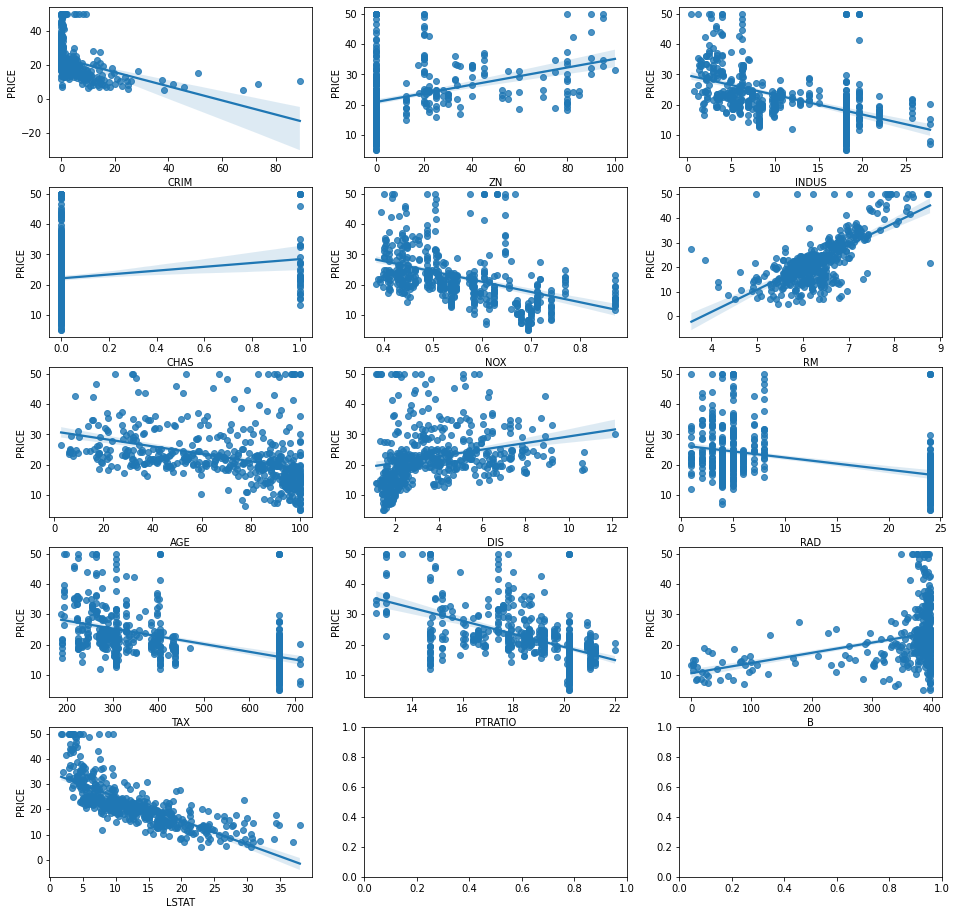

In [43]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)
# CRIM : 지역별 범죄 발생률
# ZN : 25000평 방피트를 초과하는 거주 지역 비율
# INDUS : 비상업 지역의 넓이 비율
# CHAS : 찰스감의 더미변수
# NOX : 일산화질소 농도
# RM : 거주할 수 있는 방 개수
# AGE : 1940년 이전에 건축된 주택 비율
# DIS : 5개 주요 고용센터까지 가중 거리
# RAD : 고속도로 접근 용이도
# TAX : 10000달러당 재산세 비율
# PTRATIO : 지역의 교사와 학생 수 비율
# B : 지역의 흑인 거주 비율
# LSTAT : 하위 계층의 비율
# PRICE(MEDV) : 본인 소유 주택 가격의 중앙값

# x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x_features = X_train.columns.to_list()

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

In [44]:
# predict 해줄땐 2차원배열
lr.predict([[0.001,15,1,0,0.59,5,10,0,1,10,5,100,1]])

array([43.25278829])

In [84]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
49,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
261,0.53412,20.0,3.97,0.0,0.6470,7.520,89.4,2.1398,5.0,264.0,13.0,388.37,7.26
503,0.06076,0.0,11.93,0.0,0.5730,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
72,0.09164,0.0,10.81,0.0,0.4130,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.12650,25.0,5.13,0.0,0.4530,6.762,43.4,7.9809,8.0,284.0,19.7,395.58,9.50
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
418,73.53410,0.0,18.10,0.0,0.6790,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88


In [45]:
train_predict = lr.predict(X_train)

In [50]:
r2_score(Y_train, train_predict)

0.7273505005599823

In [53]:
# train보다 test가 더 잘나와서 좋당
mse = mean_squared_error(Y_train, train_predict)
mse

24.42999235657573

In [54]:
rmse = np.sqrt(mse)
rmse

4.942670569295078

In [58]:
one_person = input('CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT PRICE >> ')
one_person

CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT PRICE >> 0.001,15,1,0,0.59,5,10,0,1,10,5,100,1


'0.001,15,1,0,0.59,5,10,0,1,10,5,100,1'

In [62]:
data = one_person.split(',')
data2 = []
for one in data:
  data2.append(float(one))
data2

[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]

In [67]:
use_data = [data2]
use_data

[[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]]

In [66]:
lr.predict(use_data)

array([43.25278829])

In [71]:
CRIM = input('CRIM >>')
ZN = input('ZN >>')
INDUS = input('INDUS >>')
CHAS = input('CHAS >>')
NOX = input('NOX >>')
RM = input('RM >>')
AGE = input('AGE >>')
DIS = input('DIS >>')
RAD = input('RAD >>')
TAX = input('TAX >>')
PTRATIO = input('PTRATIO >>')
B = input('B >>')
LSTAT = input('LSTAT >>')

CRIM >>0.001
ZN >>15.0
INDUS >>1.0
CHAS >>0.0
NOX >>0.59
RM >>5.0
AGE >>10.0
DIS >>0.0
RAD >>1.0
TAX >>10.0
PTRATIO >>5.0
B >>100.0
LSTAT >>1.0


In [82]:
# float으로 변환하여 2차원으로 변형하여 predict!
list1 = [CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT]
# 2차원으로 해주기 위해 list에 [] 감싸줌
list2 = [list(map(lambda x: float(x),list1))]
list2

[[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]]

In [83]:
lr.predict(list2)

array([43.25278829])